In [148]:

import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import matplotlib.animation as anim
import pandas as pd
from matplotlib import rc

def progress_bar(iteration, total, prefix='', suffix='', decimals=1, length=50, fill='█', print_end="\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        print_end   - Optional  : end character; default is '\r' to overwrite previous line (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filled_length = int(length * iteration // total)
    bar = fill * filled_length + '-' * (length - filled_length)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end=print_end)
    # Print New Line on Complete
    if iteration == total:
        print("\n")




In [149]:

default_dpi=100
scale=2.0
posciciones= pd.read_csv('Gas2D_pos.txt', header=None)
velocidades= pd.read_csv('Gas2D_vel.txt', header=None)

posciciones=posciciones.iloc[:,:-1]
velocidades=velocidades.iloc[:,:-1]	


posciciones_x = posciciones.iloc[:, ::2]
posciciones_y = posciciones.iloc[:, 1::2]

velocidades_x = velocidades.iloc[:, ::2]
velocidades_y = velocidades.iloc[:, 1::2]


x=posciciones_x.to_numpy()
y=posciciones_y.to_numpy()
vel_x=velocidades_x.to_numpy()
vel_y=velocidades_y.to_numpy()
print(x.transpose().shape)
print(vel_x.transpose().shape)

(225, 147)
(225, 147)


In [150]:

N = x.shape[1]

r = 25

fps = 30
q=1/fps
t_max = 10

dt = 0.001
Frames = x.shape[0]

xi = np.zeros(N)
yi = np.zeros(N)
vxi = np.zeros(N)
vyi = np.zeros(N)

X = np.zeros((N, Frames))
Y = np.zeros((N, Frames))
print(X.shape)

X= x.transpose()
Y= y.transpose()

# rc('font',**{'family':'serif','serif':['Times New Roman']})
# rc('text', usetex=True)        




(225, 147)


MovieWriter ffmpeg unavailable; using Pillow instead.


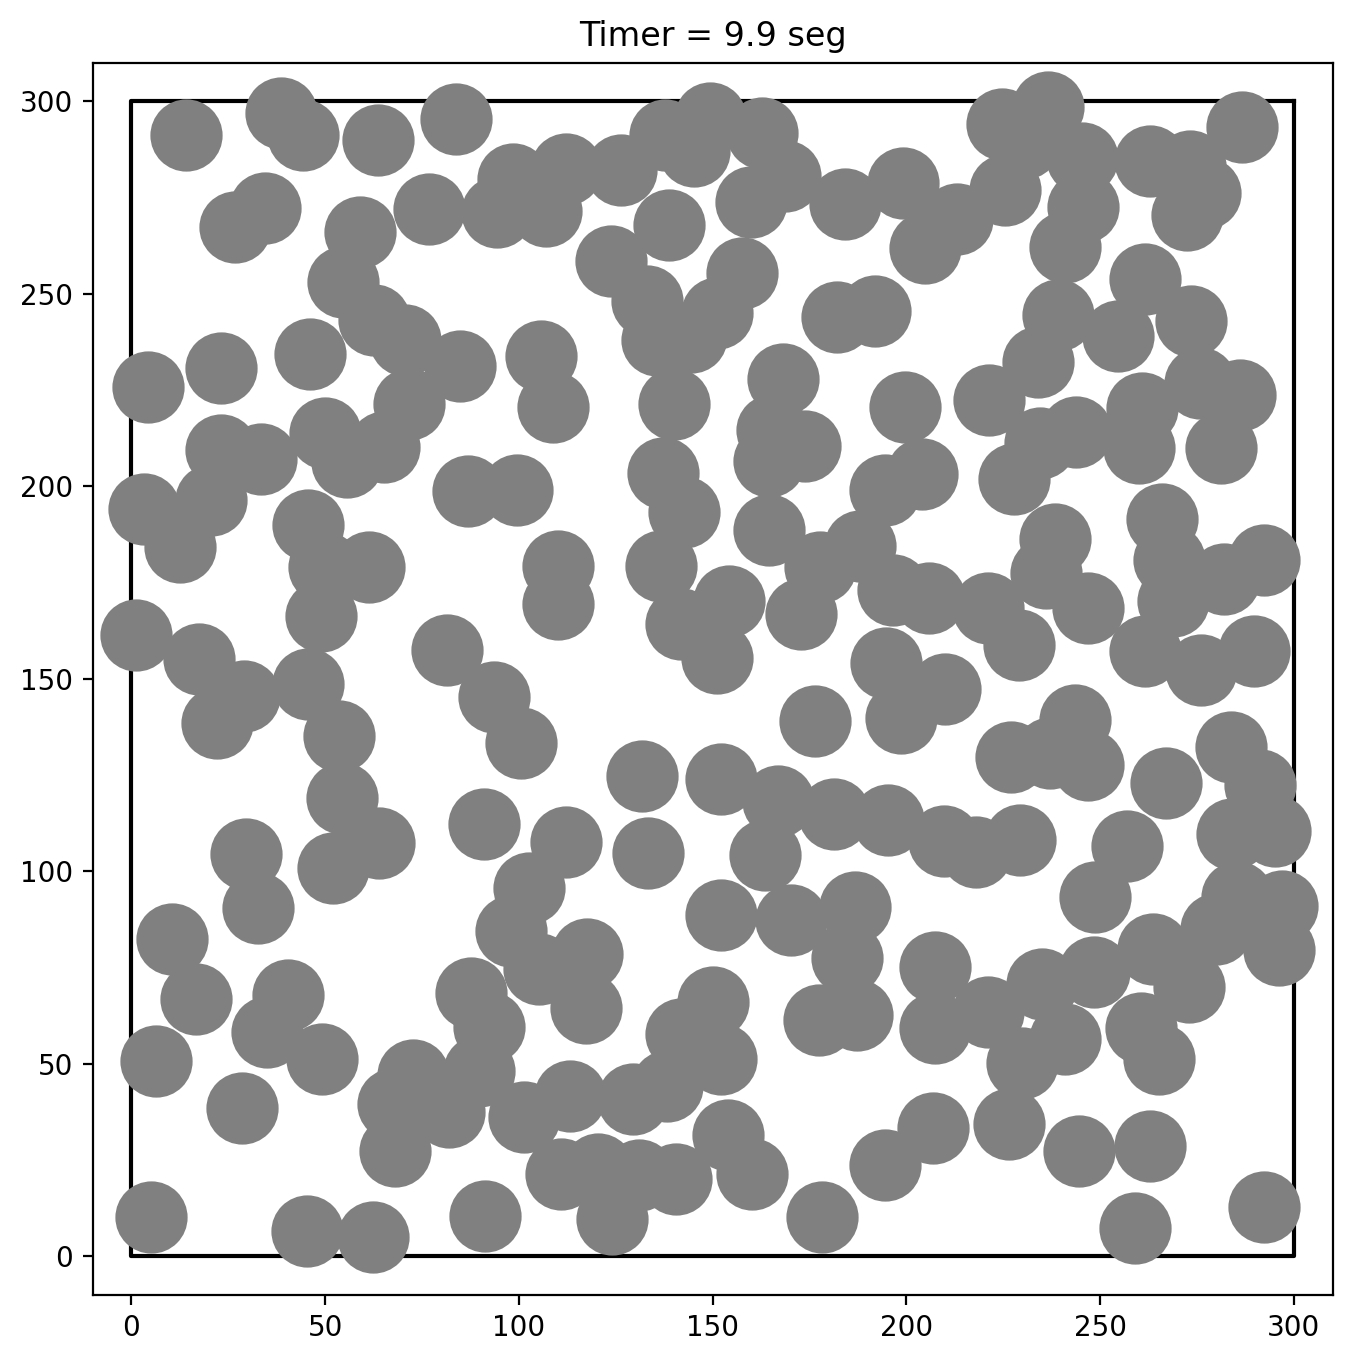

In [151]:
Fig = plt.figure(figsize = (8, 8), dpi = default_dpi*scale)

Ax = Fig.add_subplot()

lim=300
Ax.set_xlim(-10, lim+10)
Ax.set_ylim(-10, lim+10)

Ax.plot([lim, lim, 0, 0, lim], [lim, 0, 0, lim, lim], color = 'black')
Masas, = Ax.plot([], [], 'o', color = 'gray', markersize = r)



def Animacion(i):
        
    Masas.set_data(X[:,i], Y[:,i])
    Ax.set_title(f'Timer = {round((i/Frames)*t_max, 1)} seg')
    progress_bar(i,Frames)
    #make a progress bar using i and Frames here


    return Masas

Anim = anim.FuncAnimation(Fig, Animacion, frames = Frames, interval = 1000/fps)
Anim.save("atomos.gif", fps=fps)
plt.show()


MovieWriter ffmpeg unavailable; using Pillow instead.


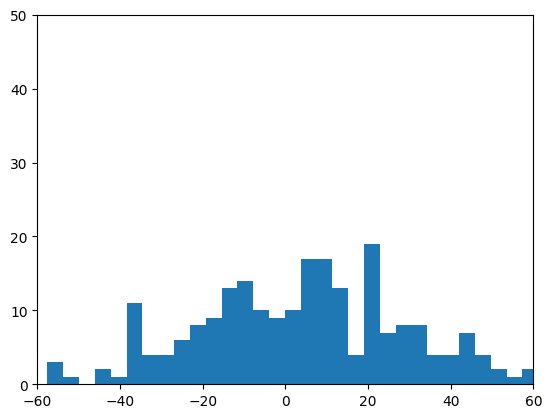

Fin del programa


In [152]:
fig, ax = plt.subplots()

velx=vel_x.transpose()
vely=vel_y.transpose()

def update_h(num):
	ax.clear()
	ax.set_ylim(0, 50)
	ax.set_xlim(-60, 60)
	ax.hist(vel_x[num], bins=40)
	Ax.set_title(f'Timer = {round((num/Frames)*t_max, 1)} seg')
	progress_bar(num,Frames)

animation = anim.FuncAnimation(fig, update_h, frames=vel_x.shape[0], interval=100)
animation.save("hist.gif", fps=fps)
plt.show()

print('Fin del programa')